## Observations and Insights 

In [579]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = mouse_metadata.merge(study_results, how="right", on=["Mouse ID"])
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [580]:
# Checking the number of mice.
unique_num_mice = mouse_study["Mouse ID"].nunique()
print(f"There are {unique_num_mice} mice in the study.")

There are 249 mice in the study.


In [581]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study["Mouse ID"].describe()
print(f"The Mouse ID with the most duplicates is g989.")

The Mouse ID with the most duplicates is g989.


In [582]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = mouse_study.loc[mouse_study["Mouse ID"] == 'g989', :]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [583]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study = mouse_study.drop_duplicates(subset=["Mouse ID"])
cleaned_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
...,...,...,...,...,...,...,...,...
245,t565,Capomulin,Female,20,17,0,45.0,0
246,i557,Capomulin,Female,1,24,0,45.0,0
247,m957,Capomulin,Female,3,19,0,45.0,0
248,f966,Capomulin,Male,16,17,0,45.0,0


In [584]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_study["Mouse ID"].count()

249

## Summary Statistics

In [585]:
# Generate a summary statistics table of mean, median, variance, standard deviation and SEM of the tumor volume for each regimen

mean = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
std = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
var = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
sem = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, 
                                 "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": std, 
                                 "Tumor Volume Std. Error": sem})
summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [586]:
cleaned_mouse_study["Drug Regimen"].unique()
drug_list = ["Capomulin","Ceftamin", "Infubinol","Ketapril", 
             "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

In [587]:
timepoint = mouse_study.groupby(["Drug Regimen"])["Timepoint"].sum()
timepoint

Drug Regimen
Capomulin    4960
Ceftamin     3515
Infubinol    3235
Ketapril     3705
Naftisol     3650
Placebo      3380
Propriva     2715
Ramicane     4885
Stelasyn     3480
Zoniferol    3525
Name: Timepoint, dtype: int64

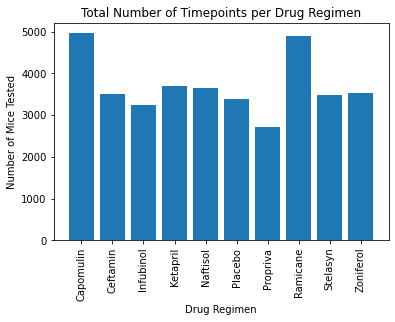

<Figure size 432x288 with 0 Axes>

In [588]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = drug_list
y = timepoint
plt.bar(x, y)
plt.xticks(drug_list, rotation="vertical")
plt.title("Total Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()
plt.savefig("../Matplotlib-Analysis/BarPlotTimepointsperDrug.png")

<AxesSubplot:title={'center':'Total Number of Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

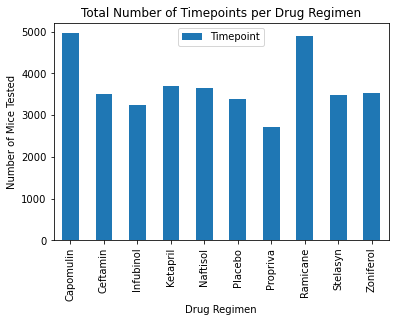

In [589]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_df = pd.DataFrame(timepoint)

timepoint_df.plot(kind="bar", title = "Total Number of Timepoints per Drug Regimen", 
                 xlabel = "Drug Regimen", ylabel = "Number of Mice Tested")

In [590]:
num_male_female = mouse_study["Sex"].value_counts()

(-1.1067602060226094,
 1.1003219145725052,
 -1.1082323758247121,
 1.1042833121640119)

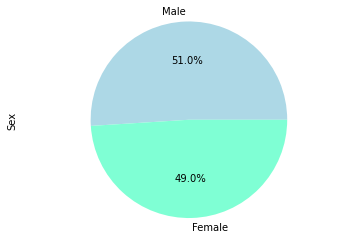

In [591]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
num_male = 958
num_female = 935

total_mice_all_measurments = mouse_study["Mouse ID"].count()
perc_male = round(num_male/total_mice_all_measurments * 100)
perc_female = round(num_female/total_mice_all_measurments * 100)

labels = ["Male", "Female"]
perc = [perc_male, perc_female]
 
plt.pie(perc, labels = labels, autopct = "%1.1f%%", colors = ["lightblue", "aquamarine"])
plt.ylabel("Sex")
plt.axis("equal")

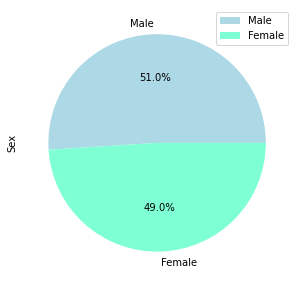

In [592]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
perc_df = pd.DataFrame(perc)
perc_df.plot(kind = "pie", subplots=True, ylabel="Sex", labels=["Male", "Female"], 
             autopct = "%1.1f%%", colors = ["lightblue", "aquamarine"], figsize=(10,5))
plt.savefig("../Matplotlib-Analysis/PiePlotGenderDistribution.png")

## Quartiles, Outliers and Boxplots

In [593]:
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [594]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

mouse_study_tumor_vol = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sum()
mouse_study_tumor_vol = pd.DataFrame(mouse_study_tumor_vol)
mouse_study_tumor_vol = mouse_study_tumor_vol.reset_index()

In [595]:
# Get the last (greatest) timepoint for each mouse
max_timepoint = mouse_study.groupby(["Mouse ID"])
max_timepoint = max_timepoint["Timepoint"].max()
max_timepoint = pd.DataFrame(max_timepoint)
max_timepoint = max_timepoint.reset_index()

mouse_timepoint = pd.merge(mouse_study, max_timepoint)
mouse_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f932,Ketapril,Male,15,29,0,45.000000,0
1,x336,Naftisol,Female,4,29,0,45.000000,0
2,h428,Ketapril,Female,1,27,0,45.000000,0
3,v199,Naftisol,Female,17,29,0,45.000000,0
4,o848,Stelasyn,Female,14,27,0,45.000000,0
...,...,...,...,...,...,...,...,...
244,r944,Capomulin,Male,12,25,45,41.581521,2
245,u364,Capomulin,Male,18,17,45,31.023923,3
246,p438,Ceftamin,Female,11,26,45,61.433892,1
247,x773,Placebo,Female,21,30,45,58.634971,4


In [596]:
# Create data frame with only the 4 drugs we want to look at further.
mouse_timepoint = mouse_timepoint.loc[(mouse_timepoint["Drug Regimen"] == "Capomulin") | (mouse_timepoint["Drug Regimen"] == "Ramicane")
                                      | (mouse_timepoint["Drug Regimen"] == "Infubinol") | (mouse_timepoint["Drug Regimen"] == "Ceftamin"), :]
mouse_timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
7,u153,Ceftamin,Female,11,25,0,45.000000,0
8,b447,Ceftamin,Male,2,30,0,45.000000,0
10,x226,Ceftamin,Male,23,28,0,45.000000,0
11,t573,Ceftamin,Female,15,27,0,45.000000,0
20,c326,Infubinol,Female,18,25,5,36.321346,0
...,...,...,...,...,...,...,...,...
235,a644,Ramicane,Female,7,17,45,32.978522,1
241,i177,Ramicane,Male,10,18,45,33.562402,3
244,r944,Capomulin,Male,12,25,45,41.581521,2
245,u364,Capomulin,Male,18,17,45,31.023923,3


In [597]:
#Each treatment's data is inside a list and then added to a list that holds the list of treatment data only. 
#Stack Overflow assisted me with the .isin() and .tolist() functions.
capomulin = mouse_timepoint[mouse_timepoint['Drug Regimen'].isin(['Capomulin'])]
capomulin = capomulin["Tumor Volume (mm3)"].tolist()

ramicane = mouse_timepoint[mouse_timepoint['Drug Regimen'].isin(['Ramicane'])]
ramicane = ramicane["Tumor Volume (mm3)"].tolist()

infubinol = mouse_timepoint[mouse_timepoint['Drug Regimen'].isin(['Infubinol'])]
infubinol = infubinol["Tumor Volume (mm3)"].tolist()

ceftamin = mouse_timepoint[mouse_timepoint['Drug Regimen'].isin(['Ceftamin'])]
ceftamin = ceftamin["Tumor Volume (mm3)"].tolist()

list_of_treatment_data = [capomulin, ramicane, infubinol, ceftamin]

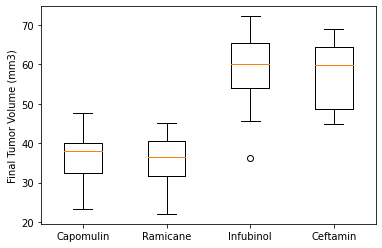

<Figure size 432x288 with 0 Axes>

In [598]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(list_of_treatment_data, whis=1.5)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()
plt.savefig("../Matplotlib-Analysis/BoxPlotTumorVolperDrug.png")

In [599]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
list_of_treatment_df = pd.DataFrame({"Capomulin" : capomulin, "Ramicane" : ramicane, 
                                      "Infubinol" : infubinol, "Ceftamin" : ceftamin})

quartiles = list_of_treatment_df.quantile([.25,.5,.75])
lowerq_capomulin = quartiles["Capomulin"][0.25]
upperq_capomulin = quartiles["Capomulin"][0.75]
iqr_capomulin = upperq_capomulin - lowerq_capomulin

lower_bound_capomulin = lowerq_capomulin - (1.25 * iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.25 * iqr_capomulin)

lowerq_ramicane = quartiles["Ramicane"][0.25]
upperq_ramicane = quartiles["Ramicane"][0.75]
iqr_ramicane = upperq_ramicane - lowerq_ramicane

lower_bound_ramicane = lowerq_ramicane - (1.25 * iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.25 * iqr_ramicane)


lowerq_infubinol = quartiles["Infubinol"][0.25]
upperq_infubinol = quartiles["Infubinol"][0.75]
iqr_infubinol = upperq_infubinol - lowerq_infubinol

lower_bound_infubinol = lowerq_infubinol - (1.25 * iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.25 * iqr_infubinol)

lowerq_ceftamin = quartiles["Ceftamin"][0.25]
upperq_ceftamin = quartiles["Ceftamin"][0.75]
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin

lower_bound_ceftamin = lowerq_ceftamin - (1.25 * iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.25 * iqr_ceftamin)



In [600]:
outliers_capomulin = list_of_treatment_df.loc[(list_of_treatment_df["Capomulin"] > upper_bound_capomulin) |
                                   (list_of_treatment_df["Capomulin"] < lower_bound_capomulin), :]
outliers_capomulin = outliers["Capomulin"]

outliers_ramicane = list_of_treatment_df.loc[(list_of_treatment_df["Ramicane"] > upper_bound_ramicane) |
                                   (list_of_treatment_df["Ramicane"] < lower_bound_ramicane), :]
outliers_ramicane = outliers["Ramicane"]

outliers_infubinol = list_of_treatment_df.loc[(list_of_treatment_df["Infubinol"] > upper_bound_infubinol) |
                                   (list_of_treatment_df["Infubinol"] < lower_bound_infubinol), :]
outliers_infubinol= outliers_infubinol["Infubinol"]

outliers_ceftamin = list_of_treatment_df.loc[(list_of_treatment_df["Ceftamin"] > upper_bound_ceftamin) |
                                   (list_of_treatment_df["Ceftamin"] < lower_bound_ceftamin), :]
outliers_ceftamin = outliers_ceftamin["Ceftamin"]


print(f"Capomulin's potential outliers: {outliers_capomulin}")
print(f"Ramicane's potential outliers: {outliers_ramicane}")
print(f"Infubinol's potential outliers: {outliers_infubinol}")
print(f"Ceftamin's potential outliers: {outliers_ceftamin}")

Capomulin's potential outliers: Series([], Name: Capomulin, dtype: float64)
Ramicane's potential outliers: Series([], Name: Ramicane, dtype: float64)
Infubinol's potential outliers: 0    36.321346
Name: Infubinol, dtype: float64
Ceftamin's potential outliers: Series([], Name: Ceftamin, dtype: float64)


## Line and Scatter Plots

In [601]:
capomulin_time_tumor = mouse_study.loc[(mouse_study["Drug Regimen"] =="Capomulin") &
                                       (mouse_study["Mouse ID"] == "b742"), :]
                                           
capomulin_time_tumor = capomulin_time_tumor[["Drug Regimen","Mouse ID","Timepoint", "Tumor Volume (mm3)"]]
capomulin_time_tumor = capomulin_time_tumor.set_index(capomulin_time_tumor["Drug Regimen"])
del capomulin_time_tumor["Drug Regimen"]
capomulin_time_tumor = pd.DataFrame(capomulin_time_tumor)
capomulin_time_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,b742,0,45.000000
Capomulin,b742,5,41.534097
Capomulin,b742,10,41.999228
Capomulin,b742,15,39.524843
Capomulin,b742,20,37.950355
Capomulin,b742,25,38.617684
Capomulin,b742,30,39.167949
Capomulin,b742,35,39.847576
Capomulin,b742,40,38.255627


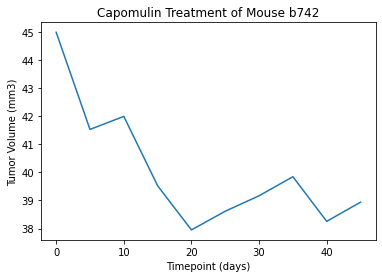

<Figure size 432x288 with 0 Axes>

In [602]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x = capomulin_time_tumor["Timepoint"]
y = capomulin_time_tumor["Tumor Volume (mm3)"]

plt.plot(x, y)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b742")
plt.show()
plt.savefig("../Matplotlib-Analysis/LinePlotMouseb742.png")

In [603]:
capomulin_weight_tumor = mouse_study.loc[(mouse_study["Drug Regimen"] =="Capomulin"), :]
capomulin_weight_tumor = capomulin_weight_tumor[["Mouse ID", "Drug Regimen","Weight (g)", "Tumor Volume (mm3)"]]
avg_capomulin_weight_tumor = capomulin_weight_tumor.groupby("Mouse ID").mean()
avg_capomulin_weight_tumor

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


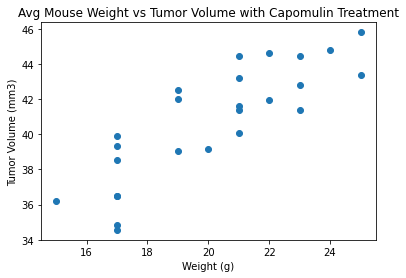

In [604]:
# Scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(avg_capomulin_weight_tumor["Weight (g)"], avg_capomulin_weight_tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Avg Mouse Weight vs Tumor Volume with Capomulin Treatment")
plt.show()

## Correlation and Regression

In [605]:
correlation = st.pearsonr(avg_capomulin_weight_tumor["Weight (g)"], avg_capomulin_weight_tumor["Tumor Volume (mm3)"])
print(f"The correlation between average mouse weight and average tumor volume is: {round(correlation[0],2)}")

The correlation between average mouse weight and average tumor volume is: 0.84


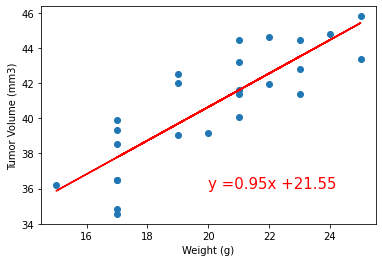

<Figure size 432x288 with 0 Axes>

In [606]:
x_values = avg_capomulin_weight_tumor["Weight (g)"]
y_values = avg_capomulin_weight_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(20, 36),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
plt.savefig("../Matplotlib-Analysis/RegressionWeightTumorCapomulin.png")

# Analysis


After analyzing the data of different drug treatments used on 249 mice, the treatment that resulted in the lowest tumor volume is Ramicane. Ramicame produced the lowest Mean Tumor Volume,	Median Tumor Volume, Tumor Volume Variance, Tumor Volume Std. Dev., Tumor Volume Std. Error suggesting that it is the best treatment of the given drug regimens. Capomulin follows closely behind in compariable results though not as successful as Ramicame. 

It is important to note, when comparing the drug treatments Capomulin, Ramicane, Infubinol, and Ceftamin, there is a potential outlier in the Infubinol data that could skew the results when evaluting this treatment's effectiveness. 

Lastly, there is a strong positive correlation between average mouse weight and average tumor volume, which suggests that as the weight of the mouse increases, so does the tumor volume. 